<a href="https://colab.research.google.com/github/Anyasalsabila/ML1/blob/main/MachineLearning_tugas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2. Import Dataset

In [3]:
cc = pd.read_csv('/content/BankChurners.csv')

3. Load dataset

In [4]:
# 2 kolom terakhir tidak dibuthkan
cc = cc.iloc[:, :-2]

pd.set_option('display.max_columns', None)
cc.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
cc.describe()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


4. Cek nilai null

In [6]:
cc.isnull().sum()


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

5. Buat model and cluster data

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

cols = cc.iloc[:, 9:].select_dtypes(['uint8', 'int64', 'float64']).columns

**6. Elbow method**

Ketika menggunakan KMeans, harus menentukan jumlah klaster yang akan digunakan oleh algoritma. Salah satu cara untuk menemukan jumlah klaster yang ideal adalah elbow method.


Gunakan elbow method untuk memilih nilai K.

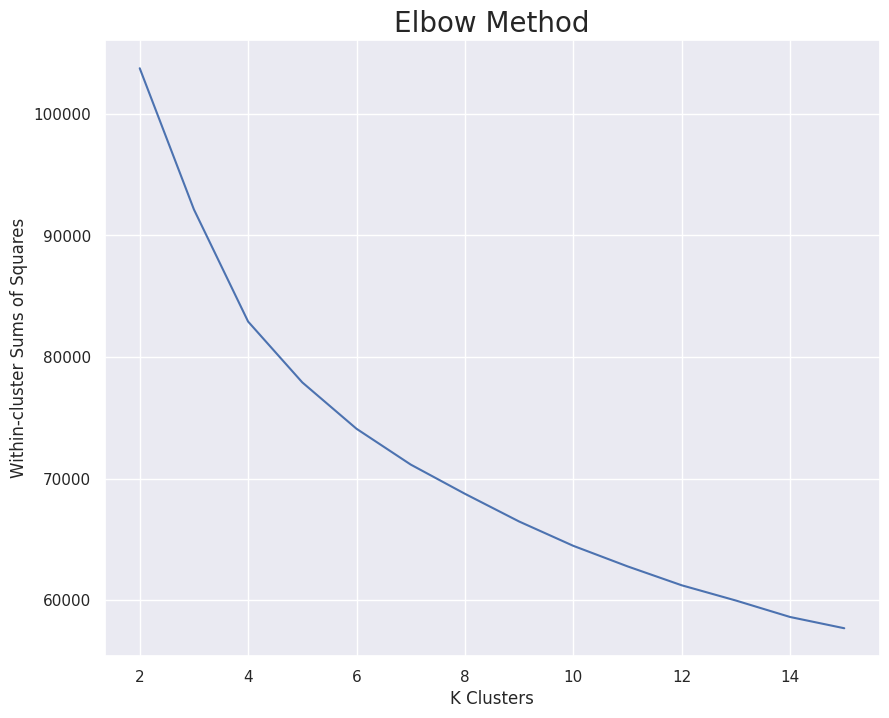

In [8]:
wcss = []

for i in range(2,16):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=1)
    data = StandardScaler().fit_transform(cc[cols])
    km.fit(data)
    wcss.append(km.inertia_)

fig = plt.figure(figsize=(10,8))
ax = sns.lineplot(x=range(2,16), y=wcss)
ax.set_title('Elbow Method')
ax.title.set_size(20)
plt.xlabel('K Clusters')
plt.ylabel('Within-cluster Sums of Squares')
plt.show()

karena kurva tidak merata dengan jelas buat sebuah pipeline yang akan memproses data terlebih dahulu dan kemudian membuat model KMeans.

In [9]:
preprocessor = Pipeline(
[
 ("scaler", StandardScaler()),
 ("pca", PCA(n_components=2, random_state=1))
]
)

clusterer = Pipeline(
     [
       (
              "kmeans",
               KMeans(
                   n_clusters=6,
                   init="k-means++",
                   n_init=50,
                   max_iter=1000,
                   random_state=1
                      )
       )
      ]
   )

pipe = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", clusterer)
        ]
    )


pipe.fit(cc[cols])

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=1))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=1000, n_clusters=6, n_init=50,
                                         random_state=1))]))])

In [10]:
print('PCA Component 1 Ratio of Explained Variance')
print(round(preprocessor['pca'].explained_variance_ratio_[0], 2))
print()
print('PCA Component 2 Ratio of Explained Variance')
print(round(preprocessor['pca'].explained_variance_ratio_[1], 2))

PCA Component 1 Ratio of Explained Variance
0.21

PCA Component 2 Ratio of Explained Variance
0.17


**7. Tambahkan label cluster ke data**

In [11]:
preprocessed_data = pipe["preprocessor"].transform(cc[cols])

predicted_labels = pipe["clusterer"]["kmeans"].labels_

print('Silhouette Score: ', round(silhouette_score(preprocessed_data, predicted_labels), 3))

Silhouette Score:  0.395


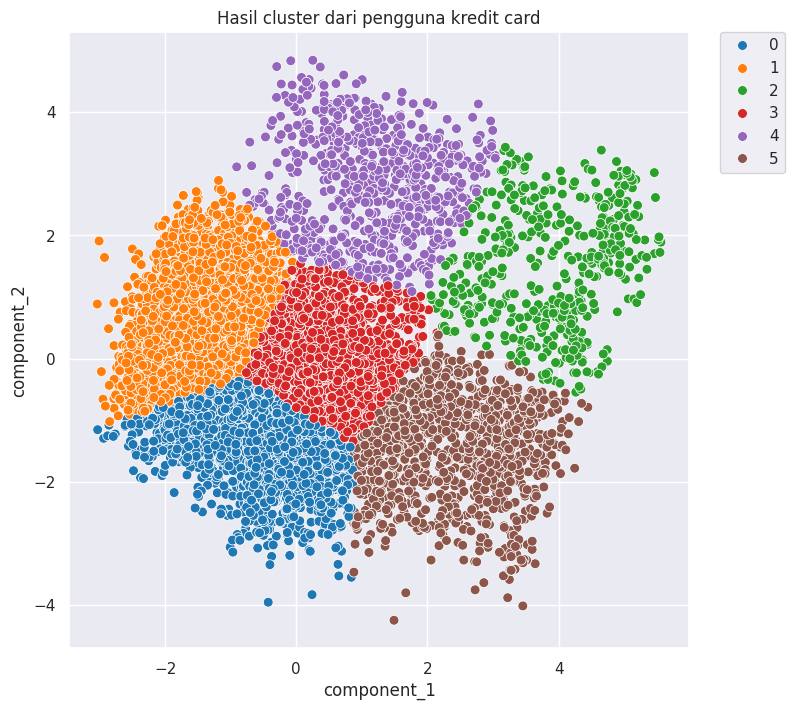

In [13]:
pcadf = pd.DataFrame(
        pipe["preprocessor"].transform(cc[cols]),
        columns=["component_1", "component_2"]
    )

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

plt.figure(figsize=(8, 8))

sp = sns.scatterplot(
        x="component_1",
        y="component_2",
        s=50,
        data=pcadf,
        hue="predicted_cluster",
        palette='tab10'
    )

sp.set_title("Hasil cluster dari pengguna kredit card")
ax.title.set_size(20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()